# Author: Dominik Keča

In [0]:
!pip install emojis
!pip install emoji

     |████████████████████████████████| 51kB 2.0MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=53627e2c7c7b4bbea324c1ae8705563cd19160b3cd5e0f03214a6275a9555a6e
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [0]:
import pandas as pd
import numpy as np
from gensim import corpora, models
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

import emojis
from emoji import UNICODE_EMOJI

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# LDA - TSNE

In [0]:
def load_data(path01):
    
    with open(path01, 'r', encoding='utf-8') as dataset01:
        lines01 = dataset01.readlines()
        print('Len of first file: ', len(lines01))
        
        words = []
        for line in lines01:
            parts = line.split(",")
            words.append(parts[0].split(' '))
        
        return words

In [0]:
my_data = load_data('/content/gdrive/My Drive/train_clean2')

df = pd.DataFrame({'col':my_data})
df['representation'] = pd.DataFrame({'col':my_data})
texts = df['representation'].values
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, 
                                    num_topics=4, passes=5, minimum_probability=0)

Len of first file:  282199


In [0]:
ldamodel.print_topics()

[(0,
  '0.012*"trump" + 0.010*"new" + 0.005*"president" + 0.005*"say" + 0.005*"news" + 0.004*"free" + 0.004*"house" + 0.004*"via" + 0.003*"available" + 0.003*"said"'),
 (1,
  '0.004*"check" + 0.004*"brexit" + 0.004*"probably" + 0.004*"think" + 0.003*"idea" + 0.003*"tweet" + 0.003*"man" + 0.003*"result" + 0.003*"mean" + 0.003*"found"'),
 (2,
  '0.011*"one" + 0.011*"like" + 0.009*"get" + 0.009*"day" + 0.008*"time" + 0.007*"good" + 0.007*"people" + 0.007*"love" + 0.007*"know" + 0.007*"see"'),
 (3,
  '0.017*"job" + 0.009*"engineer" + 0.008*"developer" + 0.007*"company" + 0.007*"software" + 0.006*"location" + 0.006*"description" + 0.006*"service" + 0.006*"team" + 0.006*"business"')]

In [0]:
hm = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])

# tsne = TSNE(perplexity=100, learning_rate=10)

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


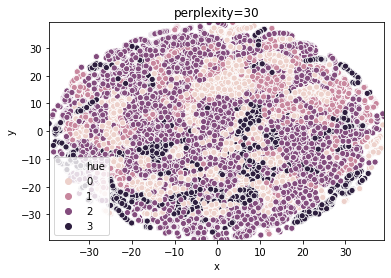

'\n\nfig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), dpi= 100)\nplot_indexes = [(i, j) for i in range(0, 2) for j in range (0, 2)]\n\ni = 0\n\nfor perplexity in [30, 50, 100, 200]:\n    tsne = TSNE(n_components=2, perplexity=perplexity, n_jobs=-1, learning_rate=200)\n    embedding = tsne.fit_transform(hm)\n    embedding = pd.DataFrame(embedding, columns=[\'x\',\'y\'])\n    embedding[\'hue\'] = hm.argmax(axis=1)\n    plt.axes(ax[plot_indexes[i]])\n    sns.scatterplot(x=embedding.x[:], y=embedding.y[:], hue=embedding[\'hue\'][:])\n    plt.title("perplexity=" + str(perplexity))\n    plt.legend()\n    lowerx = np.min(embedding.x)\n    upperx = np.max(embedding.x)\n    lowery = np.min(embedding.y)\n    uppery = np.max(embedding.y)\n    axes = plt.gca()\n    axes.set_xlim([lowerx, upperx])\n    axes.set_ylim([lowery, uppery])\n    i += 1\n\nplt.subplots_adjust(wspace=0.3, hspace=0.3)\nplt.show()\n'

In [0]:

tsne = TSNE(n_components=2, perplexity=30, n_jobs=-1, learning_rate=200)
embedding1 = tsne.fit_transform(hm)
embedding1 = pd.DataFrame(embedding1, columns=['x','y'])
embedding1['hue'] = hm.argmax(axis=1)
sns.scatterplot(x=embedding1.x[:], y=embedding1.y[:], hue=embedding1['hue'][:])
plt.title("perplexity=" + str(30))
plt.legend()
lower = np.min(embedding1.x[:])
upper = np.max(embedding1.x[:])
axes = plt.gca()
axes.set_xlim([lower, upper])
axes.set_ylim([np.min(embedding1.y[:]), np.max(embedding1.y[:])])
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


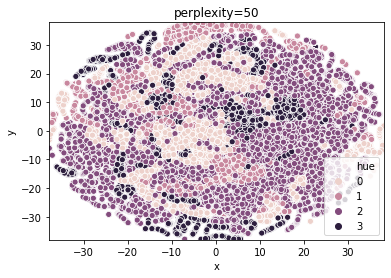

In [0]:
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-1, learning_rate=200)
embedding2 = tsne.fit_transform(hm)
embedding2 = pd.DataFrame(embedding2, columns=['x','y'])
embedding2['hue'] = hm.argmax(axis=1)
sns.scatterplot(x=embedding2.x[:], y=embedding2.y[:], hue=embedding2['hue'][:])
plt.title("perplexity=" + str(50))
plt.legend()
lower = np.min(embedding2.x[:])
upper = np.max(embedding2.x[:])
axes = plt.gca()
axes.set_xlim([lower, upper])
axes.set_ylim([np.min(embedding2.y[:]), np.max(embedding2.y[:])])
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


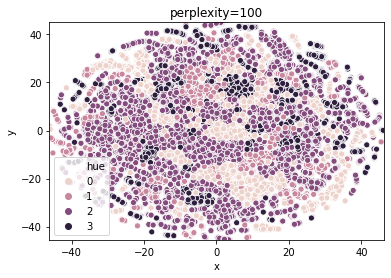

In [0]:
tsne = TSNE(n_components=2, perplexity=100, n_jobs=-1, learning_rate=200)
embedding3 = tsne.fit_transform(hm)
embedding3 = pd.DataFrame(embedding3, columns=['x','y'])
embedding3['hue'] = hm.argmax(axis=1)
sns.scatterplot(x=embedding3.x[:], y=embedding3.y[:], hue=embedding3['hue'][:])
plt.title("perplexity=" + str(100))
plt.legend()
lower = np.min(embedding3.x[:])
upper = np.max(embedding3.x[:])
axes = plt.gca()
axes.set_xlim([lower, upper])
axes.set_ylim([np.min(embedding3.y[:]), np.max(embedding3.y[:])])
plt.show()

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


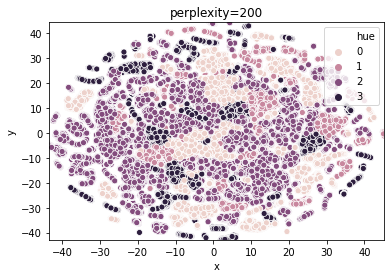

In [0]:
tsne = TSNE(n_components=2, perplexity=200, n_jobs=-1, learning_rate=200)
embedding4 = tsne.fit_transform(hm)
embedding4 = pd.DataFrame(embedding4, columns=['x','y'])
embedding4['hue'] = hm.argmax(axis=1)
sns.scatterplot(x=embedding4.x[:], y=embedding4.y[:], hue=embedding4['hue'][:])
plt.title("perplexity=" + str(200))
plt.legend()
lower = np.min(embedding4.x[:])
upper = np.max(embedding4.x[:])
axes = plt.gca()
axes.set_xlim([lower, upper])
axes.set_ylim([np.min(embedding4.y[:]), np.max(embedding4.y[:])])
plt.show()

# PLOTS

In [0]:
tweets_train = pd.read_csv('/content/gdrive/My Drive/train_clean_bert_extra.csv', encoding='utf-8',
                           names=['tweet', 'emoji', 'RT', 'url', 'mention', 'hashtag', 'class'])

## Categories likelihood

In [0]:
def count_everything(data):

    male_values = np.zeros(5)
    female_values = np.zeros(5)
    bot_values = np.zeros(5)
    male_number = 0
    female_number = 0
    bot_number = 0

    for index, row in data.iterrows():
        
        emoji = 0
        if row['emoji'] != '0':
            emoji = 1
        
        RT = row['RT']
        url = row['url']
        mention = row['mention']
        hashtag = row['hashtag']
        values = np.array([emoji, RT, url, mention, hashtag])

        if row['class'] == 'male':
            male_values = np.add(male_values, values)
            male_number += 1
        elif row['class'] == 'female':
            female_values = np.add(female_values, values)
            female_number += 1
        else:
            bot_values = np.add(bot_values, values)
            bot_number += 1
    
    print('Male tweets: ', male_number)
    print('Female tweets: ', female_number)
    print('Bot tweets: ', bot_number)
    print('Male counts: ', male_values)
    print('Female counts: ', female_values)
    print('Bot counts: ', bot_values)

    return male_values, female_values, bot_values, male_number, female_number, bot_number

In [0]:
m_val, f_val, b_val, m_tweets, f_tweets, b_tweets = count_everything(tweets_train)

Male tweets:  89628
Female tweets:  89233
Bot tweets:  109317
Male counts:  [ 9049. 29912. 33404. 63107. 16646.]
Female counts:  [15110. 37250. 36170. 64950. 21376.]
Bot counts:  [ 4426. 10712. 66994. 17966. 17025.]


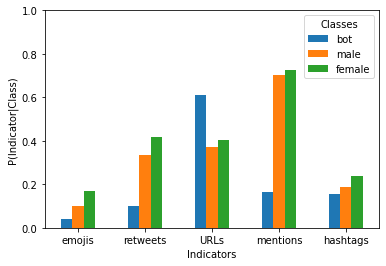

In [0]:
m_val = m_val.tolist()
f_val = f_val.tolist()
b_val = b_val.tolist()

N = len(m_val)
for i in range(N):
    male = m_val[i]
    female = f_val[i]
    bot = b_val[i]
    m_val[i] = male / m_tweets
    f_val[i] = female / f_tweets
    b_val[i] = bot / b_tweets

categories = ['emojis', 'retweets', 'URLs', 'mentions', 'hashtags']
df = pd.DataFrame({'bot': b_val,
                   'male': m_val,
                   'female': f_val}, index=categories)

ax = df.plot.bar(rot=0)
plt.ylim(0, 1)
plt.ylabel('P(Indicator|Class)')
plt.xlabel('Indicators')
plt.legend(title='Classes')
plt.savefig('/content/gdrive/My Drive/categories_likelihood.png')
plt.show()

## Emoji categories likelihood

In [0]:
def count_emojis(data):

    categories = emojis.db.get_categories()
    male_values = np.zeros(len(categories))
    female_values = np.zeros(len(categories))
    bot_values = np.zeros(len(categories))
    male_number = 0
    female_number = 0
    bot_number = 0
    for index, row in data.iterrows():
        if row['emoji'] != '0':
            values = count_emoji_categories(row['emoji'], categories)
            if row['class'] == 'male':
                male_values = np.add(male_values, values)
                male_number += 1
            elif row['class'] == 'female':
                female_values = np.add(female_values, values)
                female_number += 1
            else:
                bot_values = np.add(bot_values, values)
                bot_number += 1
        
    print('Male emoji tweets: ', male_number)
    print('Female emoji tweets: ', female_number)
    print('Bot emoji tweets: ', bot_number)
    print('Male emoji counts: ', male_values)
    print('Female emoji counts: ', female_values)
    print('Bot emoji counts: ', bot_values)

    return male_values, female_values, bot_values, male_number, female_number, bot_number


def count_emoji_categories(emoji_string, categories):
    
    category_counts = np.zeros(len(categories))
    for simbol in emoji_string:
        
        i = -1
        for category in categories:
            i += 1
            for emoji in emojis.db.get_emojis_by_category(category):

                if simbol == emoji[1]:
                    category_counts[i] = 1
                    break
    
    return category_counts

In [0]:
print(emojis.db.get_categories())

{'Activities', 'Flags', 'Travel & Places', 'People & Body', 'Food & Drink', 'Objects', 'Smileys & Emotion', 'Animals & Nature', 'Symbols'}


In [0]:
m_emojis, f_emojis, b_emojis, m_emoji_tw, f_emoji_tw, b_emoji_tw = count_emojis(tweets_train)

Male emoji tweets:  9049
Female emoji tweets:  15110
Bot emoji tweets:  4426
Male emoji counts:  [ 606.   47.  506. 2165.  411.  549. 5279.  419.  132.]
Female emoji counts:  [ 940.   34.  926. 3533. 1182.  800. 9149.  944.  191.]
Bot emoji counts:  [ 209.    3.  677. 1674.   37.  107.  542.   66.  109.]


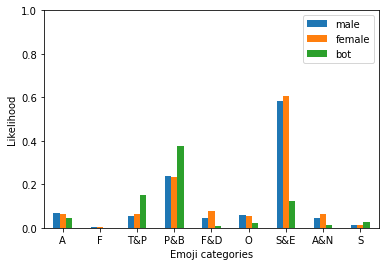

In [0]:
m_emojis = m_emojis.tolist()
f_emojis = f_emojis.tolist()
b_emojis = b_emojis.tolist()

N = len(m_emojis)
for i in range(N):
    male = m_emojis[i]
    female = f_emojis[i]
    bot = b_emojis[i]
    m_emojis[i] = male / m_emoji_tw
    f_emojis[i] = female / f_emoji_tw
    b_emojis[i] = bot / b_emoji_tw

categories = ['A', 'F', 'T&P', 'P&B', 'F&D', 'O', 'S&E', 'A&N', 'S']
df = pd.DataFrame({'male': m_emojis,
                   'female': f_emojis,
                   'bot': b_emojis}, index=categories)

ax = df.plot.bar(rot=0)
plt.ylim(0, 1)
plt.ylabel('Likelihood')
plt.xlabel('Emoji categories')
plt.savefig('/content/gdrive/My Drive/emoji_categories_likelihood.png')